# Team 3 - Group project - Part B

Yan Pui Joanna Lee,

Harmeet Kaur,

Neda Iranmanesh,

Eric Koritko,

Balakumar Janakiraman,

NItin Jain,

David Klaassen.

In [1]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import seaborn as sns
import mpmath
import matplotlib.pyplot as plt
%matplotlib inline
companies_pd = pd.read_csv('companies.csv')
indicator_pd = pd.read_csv('indicators_by_company.csv')
balance_pd = pd.merge(companies_pd,indicator_pd,how='outer',on="company_id")
df = pd.read_csv('indicators_companies.csv',sep =',')

In [2]:
start = datetime.datetime(2011, 1, 22)
end = datetime.datetime(2019, 7, 23)

In [3]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
MDT =pdr.get_data_yahoo('MDT', start = start , end = end)

In [ ]:
COP =pdr.get_data_yahoo('COP', start = start , end = end)

In [ ]:
GOOG=pdr.get_data_yahoo('GOOG', start = start , end = end)

In [ ]:
GM=pdr.get_data_yahoo('GM', start = start , end = end)

In [ ]:
XOM=pdr.get_data_yahoo('XOM', start = start , end = end)

In [ ]:
 MSFT=pdr.get_data_yahoo('MSFT', start = start , end = end)

In [4]:
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy, scipy.stats


In [5]:

df.head(2)

,company_id,indicator_id,2010,2011,2012,2013,2014,2015,2016
0,1000045,AccountsPayableAndAccruedLiabilitiesCurrentAnd...,NaN,6612429.0,7405579.0,8924919.0,7841070.0,5839000.0,NaN
1,1000045,AccumulatedDepreciationDepletionAndAmortizatio...,NaN,NaN,2111343.0,2242703.0,2236449.0,2462000.0,NaN


In [6]:
balance_pd.head(2)

,company_id,name_latest,names_previous,indicator_id,2010,2011,2012,2013,2014,2015,2016
0,1000045,Nicholas Financial Inc,NaN,AccountsPayableAndAccruedLiabilitiesCurrentAnd...,NaN,6612429.0,7405579.0,8924919.0,7841070.0,5839000.0,NaN
1,1000045,Nicholas Financial Inc,NaN,AccumulatedDepreciationDepletionAndAmortizatio...,NaN,NaN,2111343.0,2242703.0,2236449.0,2462000.0,NaN


In [7]:
indicators= ['Assets',
'StockholdersEquity',
'NetCashProvidedByUsedInFinancingActivities',
'CommonStockSharesAuthorized',
'CashAndCashEquivalentsPeriodIncreaseDecrease',
'CommonStockValue',
'CommonStockSharesIssued',
'CommonStockParOrStatedValuePerShare',
'NetCashProvidedByUsedInInvestingActivities',
'PropertyPlantAndEquipmentNet',
'AssetsCurrent',
'LiabilitiesCurrent',
'CommonStockSharesOutstanding',
'Liabilities'
 ]

In [8]:
Tables=df.loc[df['indicator_id'].isin(indicators),['company_id','indicator_id','2011']]
Tables=pd.melt(Tables, id_vars=['company_id', 'indicator_id'], var_name='year', value_name='value')
Tables=Tables.loc[Tables['year']=='2011',['company_id','indicator_id','value']].pivot(index='company_id',columns='indicator_id', values='value').dropna()
Tables.head(5)

indicator_id,Assets,AssetsCurrent,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockParOrStatedValuePerShare,CommonStockSharesAuthorized,CommonStockSharesIssued,CommonStockSharesOutstanding,CommonStockValue,Liabilities,LiabilitiesCurrent,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,PropertyPlantAndEquipmentNet,StockholdersEquity
company_id,,,,,,,,,,,,,,
2034,2.992800e+08,1.919690e+08,-3802000.0,0.01,40000000.0,26937000.0,26937000.0,269000.0,1.312770e+08,7.364100e+07,-15295000.0,-4.200000e+04,1.170500e+07,1.680030e+08
2178,3.788400e+08,3.049650e+08,8034000.0,0.10,7500000.0,4217596.0,4217596.0,422000.0,2.681580e+08,2.560940e+08,-2404000.0,-4.537700e+07,6.923500e+07,1.106820e+08
2186,3.184700e+07,2.298000e+07,-2357000.0,0.60,20000000.0,13519323.0,13519323.0,8111000.0,3.778000e+06,3.513000e+06,-2000000.0,-2.150000e+05,1.158000e+06,2.806900e+07
2491,9.704670e+08,4.804590e+08,-33752000.0,0.10,100000000.0,63150000.0,42102000.0,6309000.0,7.729920e+08,2.140370e+08,-126946000.0,-3.519800e+07,3.066700e+07,1.961080e+08
2969,1.429070e+10,3.189800e+09,48200000.0,1.00,300000000.0,249455584.0,210185256.0,249400000.0,8.352000e+09,2.342000e+09,-484500000.0,-1.212200e+09,7.412000e+09,5.795800e+09


In [9]:
Tables=df.loc[df['indicator_id'].isin(indicators),['company_id','indicator_id','2011']]
Tables=pd.melt(Tables, id_vars=['company_id', 'indicator_id'], var_name='year', value_name='value')
Tables=Tables.loc[Tables['year']=='2011',['company_id','indicator_id','value']].pivot(index='company_id',columns='indicator_id', values='value').dropna()
Tables.head(5)

indicator_id,Assets,AssetsCurrent,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockParOrStatedValuePerShare,CommonStockSharesAuthorized,CommonStockSharesIssued,CommonStockSharesOutstanding,CommonStockValue,Liabilities,LiabilitiesCurrent,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,PropertyPlantAndEquipmentNet,StockholdersEquity
company_id,,,,,,,,,,,,,,
2034,2.992800e+08,1.919690e+08,-3802000.0,0.01,40000000.0,26937000.0,26937000.0,269000.0,1.312770e+08,7.364100e+07,-15295000.0,-4.200000e+04,1.170500e+07,1.680030e+08
2178,3.788400e+08,3.049650e+08,8034000.0,0.10,7500000.0,4217596.0,4217596.0,422000.0,2.681580e+08,2.560940e+08,-2404000.0,-4.537700e+07,6.923500e+07,1.106820e+08
2186,3.184700e+07,2.298000e+07,-2357000.0,0.60,20000000.0,13519323.0,13519323.0,8111000.0,3.778000e+06,3.513000e+06,-2000000.0,-2.150000e+05,1.158000e+06,2.806900e+07
2491,9.704670e+08,4.804590e+08,-33752000.0,0.10,100000000.0,63150000.0,42102000.0,6309000.0,7.729920e+08,2.140370e+08,-126946000.0,-3.519800e+07,3.066700e+07,1.961080e+08
2969,1.429070e+10,3.189800e+09,48200000.0,1.00,300000000.0,249455584.0,210185256.0,249400000.0,8.352000e+09,2.342000e+09,-484500000.0,-1.212200e+09,7.412000e+09,5.795800e+09


In [10]:
df_rtba=balance_pd.loc[balance_pd['indicator_id'].isin(indicators),['company_id','name_latest','indicator_id','2011','2012','2013','2014','2015']]

In [11]:
df_rtba.head(5)

,company_id,name_latest,indicator_id,2011,2012,2013,2014,2015
3,1000045,Nicholas Financial Inc,Assets,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0
8,1000045,Nicholas Financial Inc,CashAndCashEquivalentsPeriodIncreaseDecrease,785514.0,-5338.0,NaN,NaN,NaN
13,1000045,Nicholas Financial Inc,CommonStockSharesAuthorized,50000000.0,50000000.0,50000000.0,50000000.0,50000000.0
14,1000045,Nicholas Financial Inc,CommonStockSharesIssued,11960975.0,12154069.0,12220874.0,12415785.0,12466000.0
15,1000045,Nicholas Financial Inc,CommonStockSharesOutstanding,11960975.0,NaN,NaN,7701981.0,7753000.0


In [12]:
def heatmap(data,title):
    fig, ax = plt.subplots(figsize=(15, 15))
    heatmap = sns.heatmap(data, cmap=plt.cm.Blues,annot=True, annot_kws={"size": 8})
   #ax.xaxis.tick_top()
    ax.set_title(title)
   # rotate
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()

In [13]:
#skipy linregress
#Pearson Correlation
from pandas import Series,DataFrame
rvalue = DataFrame(np.nan,index=indicators,columns=indicators)
#PValue
pvalue = DataFrame(np.nan,index=indicators,columns=indicators)
#StdErr
stderr = DataFrame(np.nan,index=indicators,columns=indicators)

In [14]:
import warnings
warnings.filterwarnings("ignore")
for c_X in indicators:
    for c_Y in indicators:
        R=linregress(Tables[[c_X,c_Y]])
        rvalue.set_value(c_Y,c_X, R.rvalue)
        pvalue.set_value(c_Y,c_X, R.pvalue)
        stderr.set_value(c_Y,c_X, R.stderr)

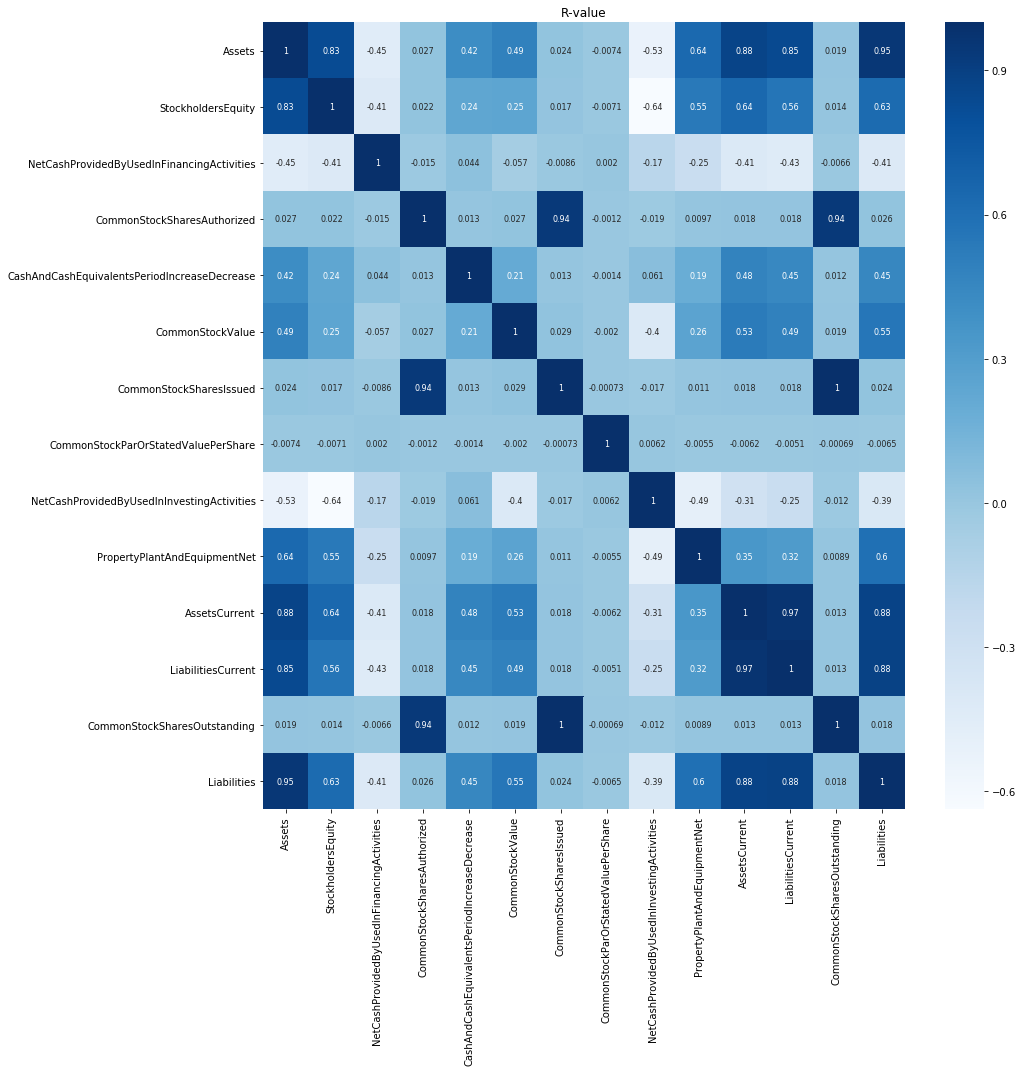

In [15]:
heatmap(rvalue,'R-value')

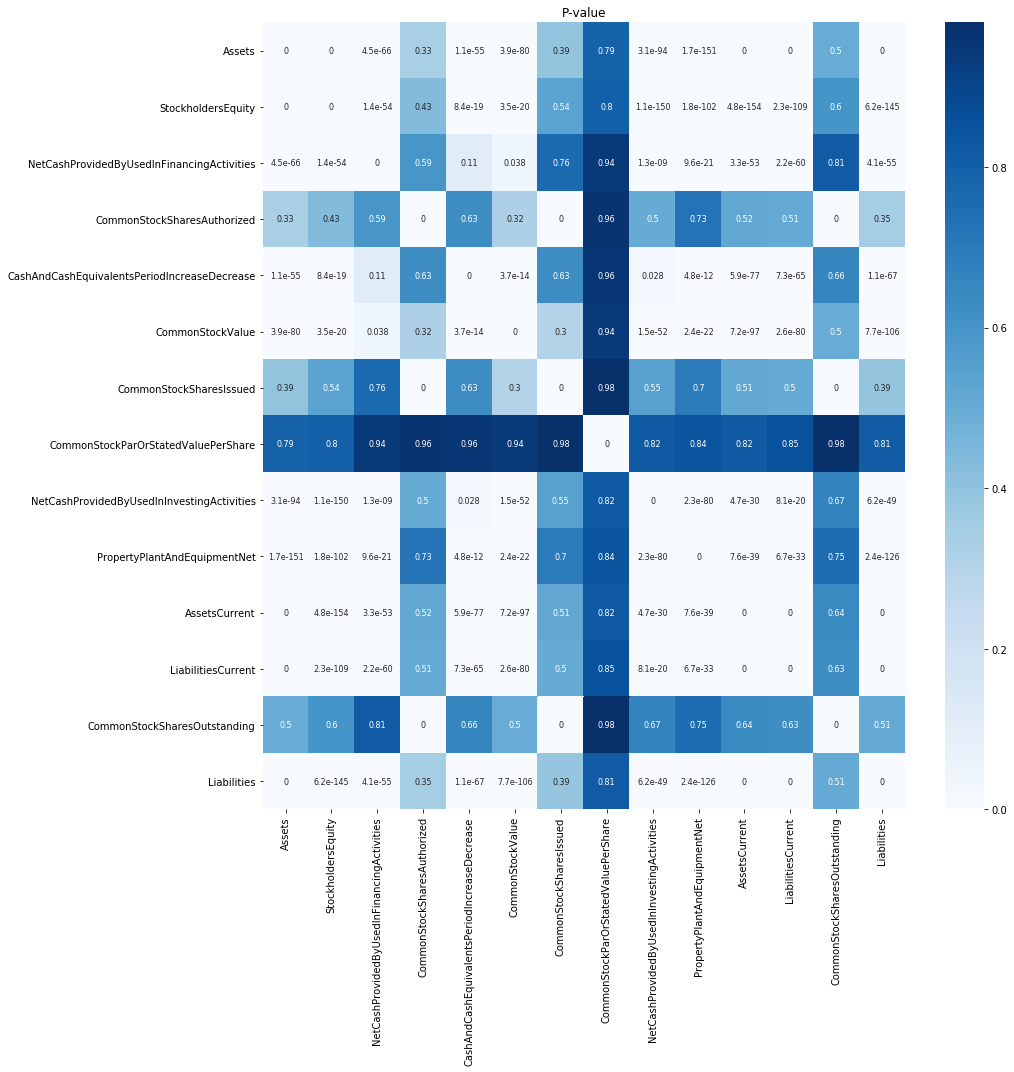

In [16]:
heatmap(pvalue,'P-value')

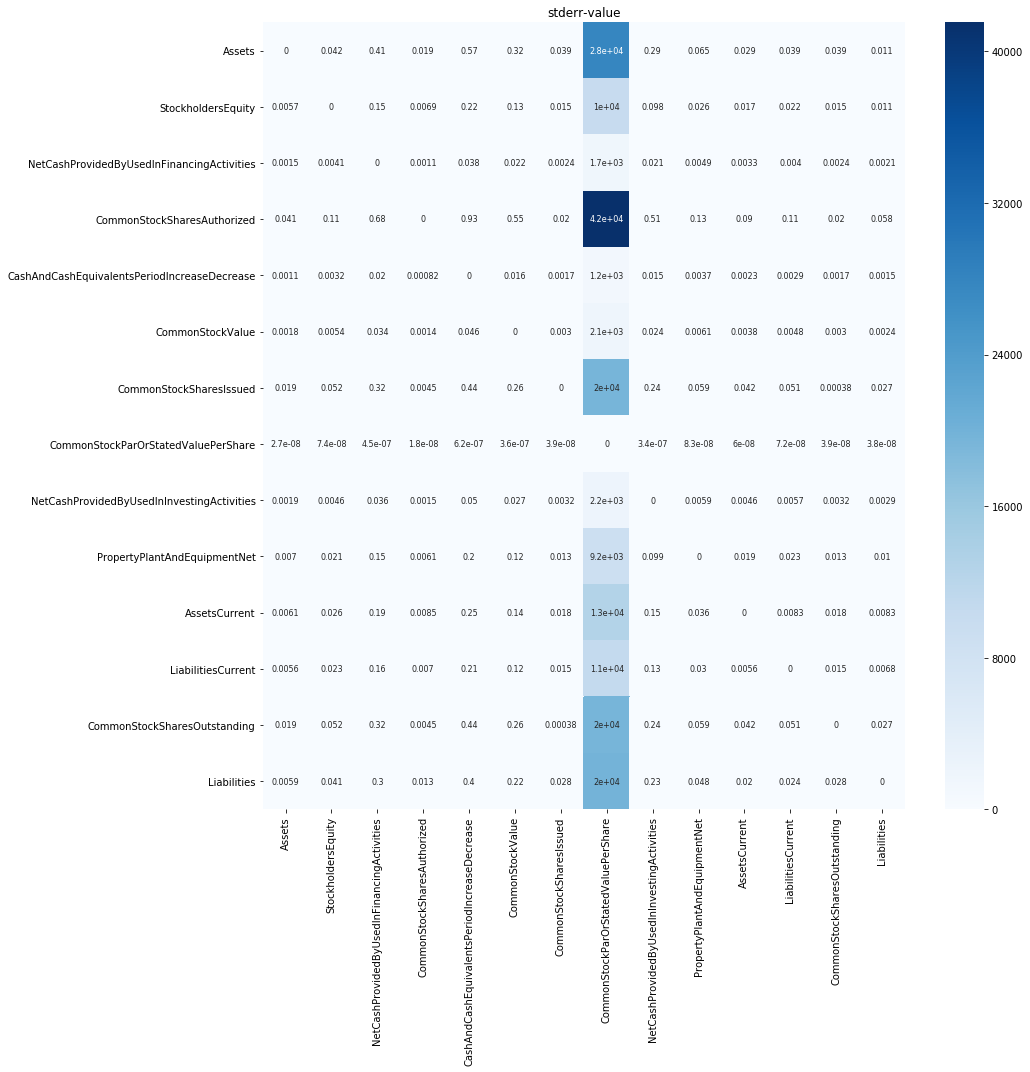

In [17]:
heatmap( stderr,'stderr-value')

By calculating CURRENT RATIOS provide how well the companies are able to meet the short term obligations.The ratio has to be 1 and above to have a good current ratio. It shows the liquidity of the companies.

In [18]:
indicators= [
'AssetsCurrent',
'LiabilitiesCurrent']
 

In [19]:
AssetsCurrent=df_rtba.loc[df_rtba['indicator_id']=='AssetsCurrent']
AssetsCurrent=pd.melt(AssetsCurrent, id_vars=['company_id','name_latest', 'indicator_id'], var_name='year', value_name='value')
AssetsCurrent.drop('indicator_id', axis=1, inplace=True)
AssetsCurrent.dropna(inplace=True)
#AssetsCurrent.head(5)

In [20]:
LiabilitiesCurrent=df_rtba.loc[df_rtba['indicator_id']=='LiabilitiesCurrent']
LiabilitiesCurrent=pd.melt(LiabilitiesCurrent, id_vars=['company_id','name_latest', 'indicator_id'], var_name='year', value_name='value')
LiabilitiesCurrent.drop('company_id', axis=1, inplace=True)
LiabilitiesCurrent.dropna(inplace=True)
#LiabilitiesCurrent.head(10)

Text(0.5, 1.0, 'AssetsCurrent')

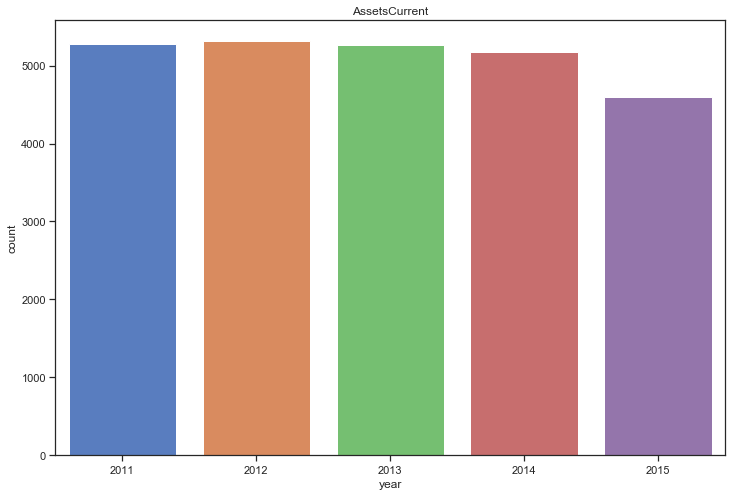

In [21]:
sns.set(style="ticks", palette="muted", color_codes=True)
plt.figure(figsize=(12,8))
ax=sns.countplot(x='year',data = AssetsCurrent)
ax.set_title('AssetsCurrent')

Text(0.5, 1.0, 'LiabilitiesCurrent')

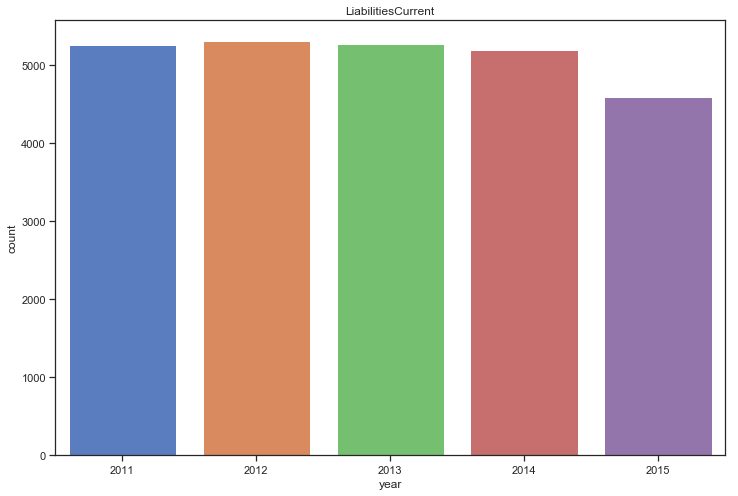

In [22]:
sns.set(style="ticks", palette="muted", color_codes=True)
plt.figure(figsize=(12,8))
ax=sns.countplot(x='year',data = LiabilitiesCurrent)
ax.set_title('LiabilitiesCurrent')

Formula for calculation of current ratio
currentratio_2011 = AssetsCurrent[['value']] / LiabilitiesCurrent[['value']]
Good currentratio has to more than 1 for companies so that they can meet short term obligations

In [23]:
AssetsCurrent['currentratio'] = AssetsCurrent[['value']] / LiabilitiesCurrent[['value']].round(0)

In [25]:
# Top 10 Companies Current Ratio for 2011
AssetsCurrent_grouped = AssetsCurrent.groupby('currentratio')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='currentratio', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07
6486,82811,Regal Beloit Corp,2011,1.291121e+09,5.379671e+07
28305,731766,Unitedhealth Group Inc,2014,2.355600e+10,2.355600e+07
7974,1058290,Cognizant Technology Solutions Corp,2012,4.814294e+09,2.281656e+07
34818,1613103,Medtronic PLC,2015,2.360000e+10,7.375000e+06
1419,1163165,Conocophillips,2011,3.021800e+10,7.355891e+06
27386,1613103,Medtronic PLC,2014,3.084400e+10,4.917730e+06
6000,730272,Repligen Corp,2011,4.689481e+07,4.689481e+06
18938,1510295,Marathon Petroleum Corp,2013,1.273700e+10,3.928748e+06
3670,1477294,Sensata Technologies Holding N.V.,2011,5.931660e+08,3.754215e+06


In [26]:
# Top 10 Companies Current Ratio for 2012
AssetsCurrent_grouped = AssetsCurrent.groupby('currentratio')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='currentratio', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07
6486,82811,Regal Beloit Corp,2011,1.291121e+09,5.379671e+07
28305,731766,Unitedhealth Group Inc,2014,2.355600e+10,2.355600e+07
7974,1058290,Cognizant Technology Solutions Corp,2012,4.814294e+09,2.281656e+07
34818,1613103,Medtronic PLC,2015,2.360000e+10,7.375000e+06
1419,1163165,Conocophillips,2011,3.021800e+10,7.355891e+06
27386,1613103,Medtronic PLC,2014,3.084400e+10,4.917730e+06
6000,730272,Repligen Corp,2011,4.689481e+07,4.689481e+06
18938,1510295,Marathon Petroleum Corp,2013,1.273700e+10,3.928748e+06
3670,1477294,Sensata Technologies Holding N.V.,2011,5.931660e+08,3.754215e+06


In [27]:
# Top 10 Companies Current Ratio for 2013
AssetsCurrent_grouped = AssetsCurrent.groupby('currentratio')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='currentratio', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07
6486,82811,Regal Beloit Corp,2011,1.291121e+09,5.379671e+07
28305,731766,Unitedhealth Group Inc,2014,2.355600e+10,2.355600e+07
7974,1058290,Cognizant Technology Solutions Corp,2012,4.814294e+09,2.281656e+07
34818,1613103,Medtronic PLC,2015,2.360000e+10,7.375000e+06
1419,1163165,Conocophillips,2011,3.021800e+10,7.355891e+06
27386,1613103,Medtronic PLC,2014,3.084400e+10,4.917730e+06
6000,730272,Repligen Corp,2011,4.689481e+07,4.689481e+06
18938,1510295,Marathon Petroleum Corp,2013,1.273700e+10,3.928748e+06
3670,1477294,Sensata Technologies Holding N.V.,2011,5.931660e+08,3.754215e+06


In [28]:
# Top 10 Companies Current Ratio for 2014
AssetsCurrent_grouped = AssetsCurrent.groupby('currentratio')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='currentratio', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07
6486,82811,Regal Beloit Corp,2011,1.291121e+09,5.379671e+07
28305,731766,Unitedhealth Group Inc,2014,2.355600e+10,2.355600e+07
7974,1058290,Cognizant Technology Solutions Corp,2012,4.814294e+09,2.281656e+07
34818,1613103,Medtronic PLC,2015,2.360000e+10,7.375000e+06
1419,1163165,Conocophillips,2011,3.021800e+10,7.355891e+06
27386,1613103,Medtronic PLC,2014,3.084400e+10,4.917730e+06
6000,730272,Repligen Corp,2011,4.689481e+07,4.689481e+06
18938,1510295,Marathon Petroleum Corp,2013,1.273700e+10,3.928748e+06
3670,1477294,Sensata Technologies Holding N.V.,2011,5.931660e+08,3.754215e+06


In [29]:
# Top 10 Companies Current Ratio for 2015
AssetsCurrent_grouped = AssetsCurrent.groupby('currentratio')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='currentratio', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07
6486,82811,Regal Beloit Corp,2011,1.291121e+09,5.379671e+07
28305,731766,Unitedhealth Group Inc,2014,2.355600e+10,2.355600e+07
7974,1058290,Cognizant Technology Solutions Corp,2012,4.814294e+09,2.281656e+07
34818,1613103,Medtronic PLC,2015,2.360000e+10,7.375000e+06
1419,1163165,Conocophillips,2011,3.021800e+10,7.355891e+06
27386,1613103,Medtronic PLC,2014,3.084400e+10,4.917730e+06
6000,730272,Repligen Corp,2011,4.689481e+07,4.689481e+06
18938,1510295,Marathon Petroleum Corp,2013,1.273700e+10,3.928748e+06
3670,1477294,Sensata Technologies Holding N.V.,2011,5.931660e+08,3.754215e+06


In [30]:
# Top 10 Companies Current Ratio between 2011- 2015
AssetsCurrent_grouped = AssetsCurrent.groupby('currentratio')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='currentratio', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07
6486,82811,Regal Beloit Corp,2011,1.291121e+09,5.379671e+07
28305,731766,Unitedhealth Group Inc,2014,2.355600e+10,2.355600e+07
7974,1058290,Cognizant Technology Solutions Corp,2012,4.814294e+09,2.281656e+07
34818,1613103,Medtronic PLC,2015,2.360000e+10,7.375000e+06
1419,1163165,Conocophillips,2011,3.021800e+10,7.355891e+06
27386,1613103,Medtronic PLC,2014,3.084400e+10,4.917730e+06
6000,730272,Repligen Corp,2011,4.689481e+07,4.689481e+06
18938,1510295,Marathon Petroleum Corp,2013,1.273700e+10,3.928748e+06
3670,1477294,Sensata Technologies Holding N.V.,2011,5.931660e+08,3.754215e+06


In [31]:

stocks = [ 'MDT','COP','GOOG','GM','MSFT','XOM']

In [32]:
data = pdr.get_data_yahoo(stocks ,start,end)

NameError: name 'pdr' is not defined

In [33]:
# Plot the closing prices for Medtronic PLC`
MDT['Adj Close'].plot(grid=True)

# Show the plot
plt.show()

NameError: name 'MDT' is not defined

In [34]:
# Plot the closing prices for Conocophillips`
COP['Adj Close'].plot(grid=True)

# Show the plot
plt.show()

NameError: name 'COP' is not defined

In [35]:
# Plot the closing prices for 
GOOG['Adj Close'].plot(grid=True)

# Show the plot
plt.show()

NameError: name 'GOOG' is not defined

stock increase is impressive for top MDT, COP,GOOG based on current ratio are good to invest

Working capital (abbreviated WC) is a financial metric which represents operating liquidity available to a business, organisation or other entity, including governmental entities.Positive working capital is the excess of current assets over liabilities

In [36]:
AssetsCurrent['wc'] = AssetsCurrent[['value']] - LiabilitiesCurrent[['value']]


In [37]:
#Top 10 companies Working capital in 2011#

AssetsCurrent_grouped = AssetsCurrent.groupby('wc')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='wc', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio,wc
28531,789019,Microsoft Corp,2014,1.247120e+11,3.519458e+05,1.247116e+11
21099,789019,Microsoft Corp,2013,1.142460e+11,1.430579e+02,1.134474e+11
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07,9.011400e+10
35250,320193,Apple Inc,2015,8.937800e+10,2.042226e+03,8.933424e+10
25882,1467858,General Motors CO,2014,8.367000e+10,6.503429e+04,8.366871e+10
6235,789019,Microsoft Corp,2011,8.508400e+10,3.957395e+01,8.293400e+10
18450,1467858,General Motors CO,2013,8.150100e+10,3.889891e+03,8.148005e+10
24114,1288776,Google Inc.,2014,8.068500e+10,9.949571e+03,8.067689e+10
36358,858877,"Cisco Systems, Inc.",2015,7.628300e+10,1.235833e+02,7.566574e+10
5540,34088,Exxon Mobil Corp,2011,7.296300e+10,2.333420e+04,7.295987e+10


In [38]:
#Top 10 companies Working capital in 2012#

AssetsCurrent_grouped = AssetsCurrent.groupby('wc')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='wc', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio,wc
28531,789019,Microsoft Corp,2014,1.247120e+11,3.519458e+05,1.247116e+11
21099,789019,Microsoft Corp,2013,1.142460e+11,1.430579e+02,1.134474e+11
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07,9.011400e+10
35250,320193,Apple Inc,2015,8.937800e+10,2.042226e+03,8.933424e+10
25882,1467858,General Motors CO,2014,8.367000e+10,6.503429e+04,8.366871e+10
6235,789019,Microsoft Corp,2011,8.508400e+10,3.957395e+01,8.293400e+10
18450,1467858,General Motors CO,2013,8.150100e+10,3.889891e+03,8.148005e+10
24114,1288776,Google Inc.,2014,8.068500e+10,9.949571e+03,8.067689e+10
36358,858877,"Cisco Systems, Inc.",2015,7.628300e+10,1.235833e+02,7.566574e+10
5540,34088,Exxon Mobil Corp,2011,7.296300e+10,2.333420e+04,7.295987e+10


In [39]:
#Top 10 companies Working capital in 2013#
AssetsCurrent_grouped = AssetsCurrent.groupby('wc')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='wc', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio,wc
28531,789019,Microsoft Corp,2014,1.247120e+11,3.519458e+05,1.247116e+11
21099,789019,Microsoft Corp,2013,1.142460e+11,1.430579e+02,1.134474e+11
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07,9.011400e+10
35250,320193,Apple Inc,2015,8.937800e+10,2.042226e+03,8.933424e+10
25882,1467858,General Motors CO,2014,8.367000e+10,6.503429e+04,8.366871e+10
6235,789019,Microsoft Corp,2011,8.508400e+10,3.957395e+01,8.293400e+10
18450,1467858,General Motors CO,2013,8.150100e+10,3.889891e+03,8.148005e+10
24114,1288776,Google Inc.,2014,8.068500e+10,9.949571e+03,8.067689e+10
36358,858877,"Cisco Systems, Inc.",2015,7.628300e+10,1.235833e+02,7.566574e+10
5540,34088,Exxon Mobil Corp,2011,7.296300e+10,2.333420e+04,7.295987e+10


In [40]:
#Top 10 companies Working capital in 2014#

AssetsCurrent_grouped = AssetsCurrent.groupby('wc')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='wc', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio,wc
28531,789019,Microsoft Corp,2014,1.247120e+11,3.519458e+05,1.247116e+11
21099,789019,Microsoft Corp,2013,1.142460e+11,1.430579e+02,1.134474e+11
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07,9.011400e+10
35250,320193,Apple Inc,2015,8.937800e+10,2.042226e+03,8.933424e+10
25882,1467858,General Motors CO,2014,8.367000e+10,6.503429e+04,8.366871e+10
6235,789019,Microsoft Corp,2011,8.508400e+10,3.957395e+01,8.293400e+10
18450,1467858,General Motors CO,2013,8.150100e+10,3.889891e+03,8.148005e+10
24114,1288776,Google Inc.,2014,8.068500e+10,9.949571e+03,8.067689e+10
36358,858877,"Cisco Systems, Inc.",2015,7.628300e+10,1.235833e+02,7.566574e+10
5540,34088,Exxon Mobil Corp,2011,7.296300e+10,2.333420e+04,7.295987e+10


In [41]:
#Top 10 companies Working capital in 2015#

AssetsCurrent_grouped = AssetsCurrent.groupby('wc')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='wc', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio,wc
28531,789019,Microsoft Corp,2014,1.247120e+11,3.519458e+05,1.247116e+11
21099,789019,Microsoft Corp,2013,1.142460e+11,1.430579e+02,1.134474e+11
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07,9.011400e+10
35250,320193,Apple Inc,2015,8.937800e+10,2.042226e+03,8.933424e+10
25882,1467858,General Motors CO,2014,8.367000e+10,6.503429e+04,8.366871e+10
6235,789019,Microsoft Corp,2011,8.508400e+10,3.957395e+01,8.293400e+10
18450,1467858,General Motors CO,2013,8.150100e+10,3.889891e+03,8.148005e+10
24114,1288776,Google Inc.,2014,8.068500e+10,9.949571e+03,8.067689e+10
36358,858877,"Cisco Systems, Inc.",2015,7.628300e+10,1.235833e+02,7.566574e+10
5540,34088,Exxon Mobil Corp,2011,7.296300e+10,2.333420e+04,7.295987e+10


In [42]:
# Overall Top companies Working Capital in 2011 to 2015 #

AssetsCurrent_grouped = AssetsCurrent.groupby('wc')
AssetsCurrent = AssetsCurrent.replace([np.inf, -np.inf], np.nan)
AssetsCurrent=AssetsCurrent.dropna()
AssetsCurrent.sort_values(by='wc', ascending=False)[:10]

,company_id,name_latest,year,value,currentratio,wc
28531,789019,Microsoft Corp,2014,1.247120e+11,3.519458e+05,1.247116e+11
21099,789019,Microsoft Corp,2013,1.142460e+11,1.430579e+02,1.134474e+11
35011,1652044,Alphabet Inc.,2015,9.011400e+10,5.566028e+07,9.011400e+10
35250,320193,Apple Inc,2015,8.937800e+10,2.042226e+03,8.933424e+10
25882,1467858,General Motors CO,2014,8.367000e+10,6.503429e+04,8.366871e+10
6235,789019,Microsoft Corp,2011,8.508400e+10,3.957395e+01,8.293400e+10
18450,1467858,General Motors CO,2013,8.150100e+10,3.889891e+03,8.148005e+10
24114,1288776,Google Inc.,2014,8.068500e+10,9.949571e+03,8.067689e+10
36358,858877,"Cisco Systems, Inc.",2015,7.628300e+10,1.235833e+02,7.566574e+10
5540,34088,Exxon Mobil Corp,2011,7.296300e+10,2.333420e+04,7.295987e+10


In [43]:
# Plot the closing prices for General Motors CO`
GM['Adj Close'].plot(grid=True)

# Show the plot
plt.show()

NameError: name 'GM' is not defined

In [44]:
# Plot the closing prices for Exxon Mobil Corp
XOM['Adj Close'].plot(grid=True)

# Show the plot
plt.show()

NameError: name 'XOM' is not defined

In [45]:
# Plot the closing prices for `
MSFT['Adj Close'].plot(grid=True)

# Show the plot
plt.show()

NameError: name 'MSFT' is not defined

Based on the stock prices of the top working capital companies GM,XOM,MSFT are good to invest

The liabilities to assets (L/A) ratio is a solvency ratio that examines how much of a company's assets are made of liabilities. A L/A ratio of 20 percent means that 20 percent of the company are liabilities.

In [46]:
indicators= [
'Assets','Liabilities']


In [47]:
sns.set(style="ticks", palette="muted", color_codes=True)
plt.figure(figsize=(12,8))
ax=sns.countplot(x='year',data = Assets)
ax.set_title('Assets')

NameError: name 'Assets' is not defined

<Figure size 864x576 with 0 Axes>

In [48]:
sns.set(style="ticks", palette="muted", color_codes=True)
plt.figure(figsize=(12,8))
ax=sns.countplot(x='year',data = Liabilities)
ax.set_title('Liabilities')

NameError: name 'Liabilities' is not defined

<Figure size 864x576 with 0 Axes>

In [49]:

Liabilities['Asset_liabilites'] = (Liabilities[['value']]/Assets[['value']] *100).round(0)

NameError: name 'Liabilities' is not defined

In [50]:
Liabilities.head(3)

NameError: name 'Liabilities' is not defined

In [51]:
Liabilities['Asset_liabilites2012'] = (Liabilities[['value']]/Assets[['value']] *100).round(0)

NameError: name 'Liabilities' is not defined

In [ ]:
Liabilities.head(3)

In [ ]:
Liabilities['Asset_liabilites2013'] = (Liabilities[['value']]/Assets[['value']] *100).round(0)

In [ ]:
Liabilities.head(3)

In [ ]:
Liabilities['Asset_liabilites2014'] = (Liabilities[['value']]/Assets[['value']] *100).round(0)

In [ ]:
Liabilities.head(3)

In [ ]:
Liabilities['Asset_liabilites2015'] = (Liabilities[['value']]/Assets[['value']] *100).round(0)

In [ ]:
Liabilities.head(3)

Issued Vs Authorised Shares. 
Treasuryshare is company's own share reacquired by the company. There is no treasury stock issued in the above companies Nicholas and Sandisk . The value would shows as negative value andand reduces shareholders equity, but we cannot be calculate here due to non availability of corresponding values in the database

In [ ]:
indicators= [
'CommonStockSharesIssued','CommonStockSharesOutstanding']

In [ ]:
CommonStockSharesIssued=df_rtba.loc[df_rtba['indicator_id']=='CommonStockSharesIssued']
CommonStockSharesIssued=pd.melt(CommonStockSharesIssued, id_vars=['company_id','name_latest', 'indicator_id'], var_name='year', value_name='value')
CommonStockSharesIssued.drop('indicator_id', axis=1, inplace=True)
CommonStockSharesIssued.dropna(inplace=True)
CommonStockSharesIssued.head(2)

In [ ]:
CommonStockSharesOutstanding=df_rtba.loc[df_rtba['indicator_id']=='CommonStockSharesOutstanding']
CommonStockSharesOutstanding=pd.melt(CommonStockSharesOutstanding, id_vars=['company_id','name_latest', 'indicator_id'], var_name='year', value_name='value')
CommonStockSharesOutstanding.drop('indicator_id', axis=1, inplace=True)
#CommonStockSharesOutstanding.drop([2], axis =0 ,inplace =True)
CommonStockSharesOutstanding.dropna(inplace=True)
CommonStockSharesOutstanding.head(2)

In [ ]:
CommonStockSharesOutstanding['TreasuryShare'] =CommonStockSharesIssued[['value']] - CommonStockSharesOutstanding[['value']]

In [ ]:
CommonStockSharesOutstanding.head(2)

In [ ]:
indicators= [
'TreasuryStockShares']

In [ ]:
TreasuryStockShares=df_rtba.loc[df_rtba['indicator_id']=='TreasuryStockShares']
TreasuryStockShares=pd.melt(TreasuryStockShares, id_vars=['company_id','name_latest', 'indicator_id'], var_name='year', value_name='value')
TreasuryStockShares.drop('indicator_id', axis=1, inplace=True)
TreasuryStockShares.dropna(inplace=True)
#TreasuryStockShares.drop([:2], axis =0 ,inplace =True)
TreasuryStockShares.head(1)

In [ ]:
sns.set(style="ticks", palette="muted", color_codes=True)
plt.figure(figsize=(12,8))
ax=sns.countplot(x='year',data = TreasuryStockShares)
ax.set_title('TreasuryStockShares')

Debt to Equity ratio is an important metric to measure degree to which company is financing its operaions thorugh debts versus wholly- owned funds
It shows the stability as it is shows the long term counterpart of liquidity. The good ratio is between 1 to 1.5

In [ ]:
indicators= [
'Liabilities','StockholdersEquity']

In [ ]:
StockholdersEquity['DebttoEquity_2012'] = Liabilities['value']/StockholdersEquity['value']

In [ ]:
StockholdersEquity.head(3)

In [ ]:
StockholdersEquity.head(3)

In [ ]:
StockholdersEquity.head(3)

In [ ]:
StockholdersEquity.head(3)

Dividend Per Share  is the sum of declared dividends issued by a company

In [ ]:
indicators= [
'CommonStockDividendsPerShareCashPaid']

In [ ]:
df_rtba.dropna(inplace = True)
df_rtba.drop('company_id', axis=1, inplace=True)
df_rtba.head(10)

In [ ]:
CommonStockDividendsPerShareCashPaid=df_rtba.loc[df_rtba['indicator_id']=='CommonStockDividendsPerShareCashPaid']
CommonStockDividendsPerShareCashPaid= pd.melt(CommonStockDividendsPerShareCashPaid, id_vars=['name_latest', 'indicator_id'], var_name='year', value_name='value')
CommonStockDividendsPerShareCashPaid.drop('indicator_id', axis=1, inplace=True)
#CommonStockSharesOutstanding.drop([2], axis =0 ,inplace =True)
CommonStockDividendsPerShareCashPaid.dropna(inplace=True)
CommonStockDividendsPerShareCashPaid.head(10)

In [ ]:
corr = df_rtba.corr()
corr

In [ ]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);